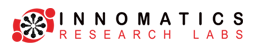

### 1. Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [3]:
df = pd.read_csv(r'E:\InnoDaat\Assignment\Ass\AssLinear.csv')

#### Let's explore the top 5 rows of the df


In [4]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [5]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [6]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [7]:
df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [8]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df.shape

(4345, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [11]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [12]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [13]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [14]:
#Null values info True: Null value is present and False: there is null value not present in the DataFrame
df.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [15]:
# total null value features wise.
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [16]:
# total null values in the df.
df.isnull().sum().sum()

322

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [17]:
NullValues=df.isnull().sum()/len(df)
NullValues

Brand           0.000000
Price           0.039586
Body            0.000000
Mileage         0.000000
EngineV         0.034522
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

##### NOTE: only ~4% of null values present in the df Price column and ~3% null value present in the EngineV column. as per the standred condition. if Null value present less then to the 5%, then we can remove it. otherwise we have to replace with the center stastics method.

In [18]:
# Before remove/process the data shape of the data
df.shape

(4345, 9)

In [19]:
# check the duplicasi in the data
df.drop_duplicates()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [20]:
# Delete the Null value, because null value is less then the 5% of the complete dataFrames.
df = df.dropna()

In [21]:
# After null value replace. Non-null value is similar count.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


#### 6. Let's check the descriptives without the missing values


In [22]:
# Now frequecy has been changed from old dataFrame data to NewDataFrame .
df.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


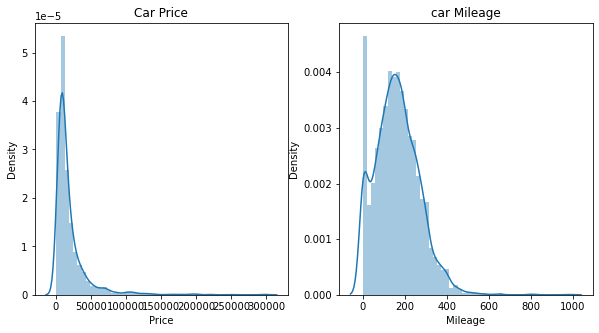

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Car Price')
sns.distplot(df.Price)

plt.subplot(122)
plt.title('car Mileage')
sns.distplot(df.Mileage)
plt.show()

<Figure size 720x576 with 0 Axes>

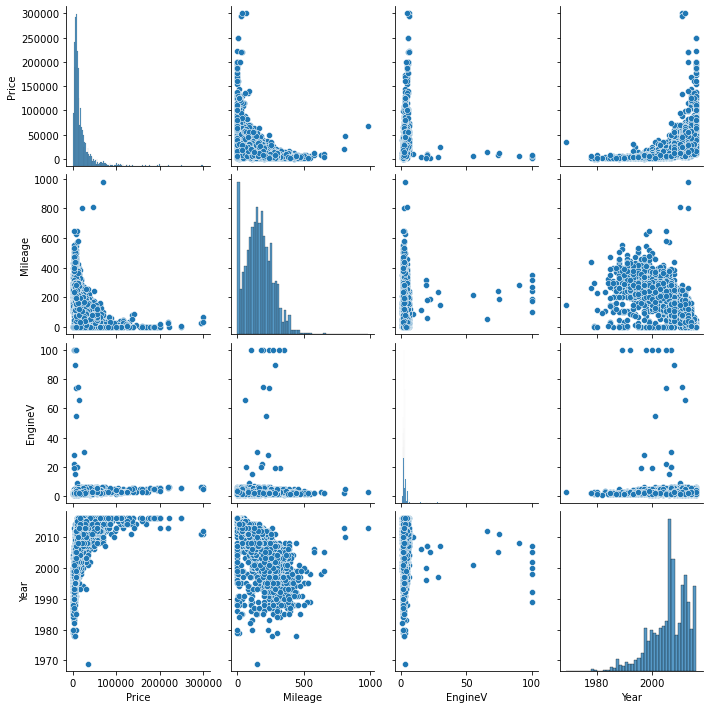

In [24]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


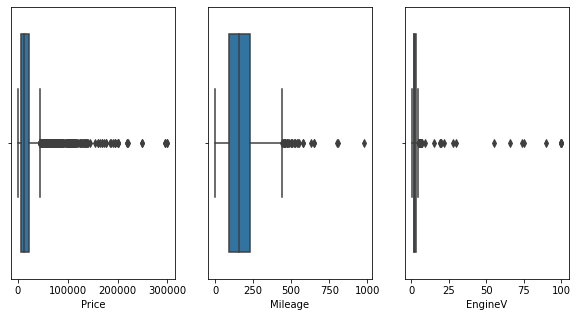

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.boxplot(df.Price)
plt.subplot(132)
sns.boxplot(df.Mileage)
plt.subplot(133)
sns.boxplot(df.EngineV)
plt.show()

In [26]:
#df.drop(df[ (df.Price > up) | (df.Price < lw) ].index , inplace=True)

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

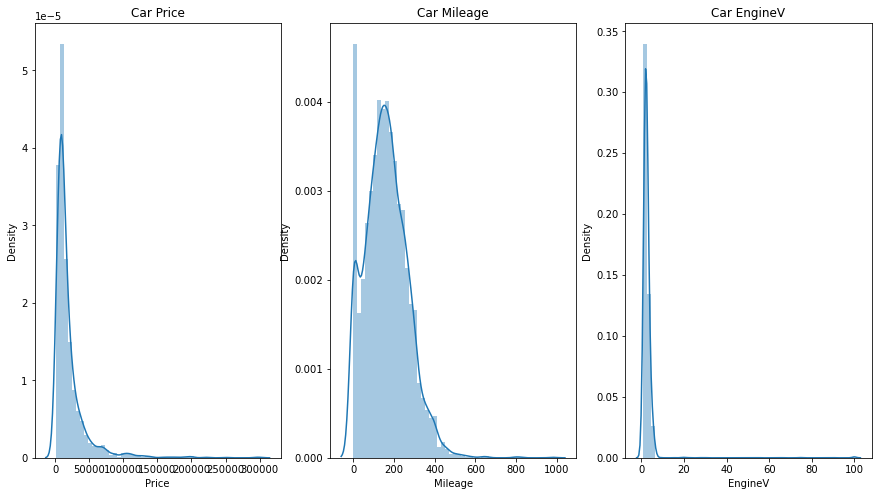

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(131)
plt.title('Car Price')
sns.distplot(df.Price)
plt.subplot(132)
plt.title('Car Mileage')
sns.distplot(df.Mileage)
plt.subplot(133)
plt.title('Car EngineV')
sns.distplot(df.EngineV)
plt.show()

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

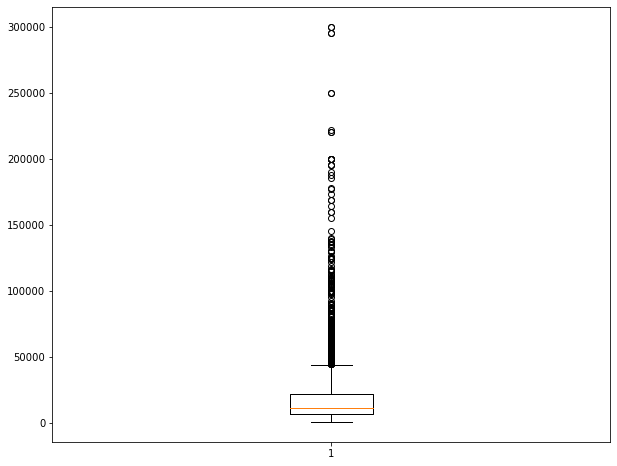

In [28]:
plt.figure(figsize=(10,8))
plt.boxplot(df.Price)
plt.show()

#### 8B. Remove the Outliers which are presented in `Price` Column

-6600.0 19200.0
473


C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


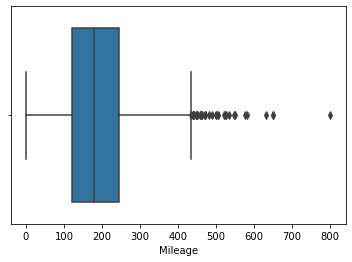

In [31]:
# Using IQR - interquntile Range 

Q1 = df['Price'].quantile(.25)
Q2 = df['Price'].quantile(.5)
Q3 = df['Price'].quantile(.75)
IQR = Q3-Q1

# Upper limit and Lower limit
lw = Q1-1.5*IQR
up = Q1+1.5*IQR
print(lw,up)

print(df['Price'][df['Price']>up].count())

sns.boxplot(df.Mileage)
plt.show()

df.drop(df[df['Price'] > up ].index, inplace = True)

#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price'}, xlabel='Price', ylabel='Density'>

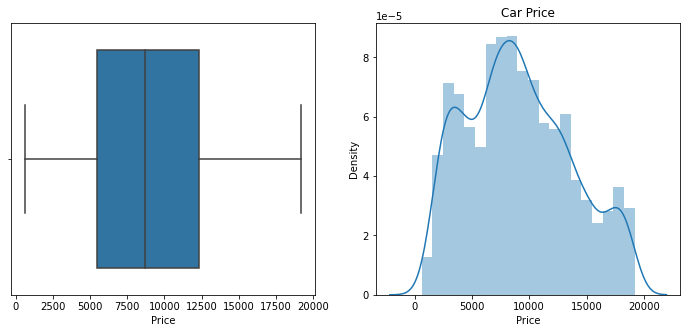

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(df.Price)

plt.subplot(122)
plt.title('Car Price')
sns.distplot(df.Price)

#### 9A. Same identify and remove the outliers in `Milage` column

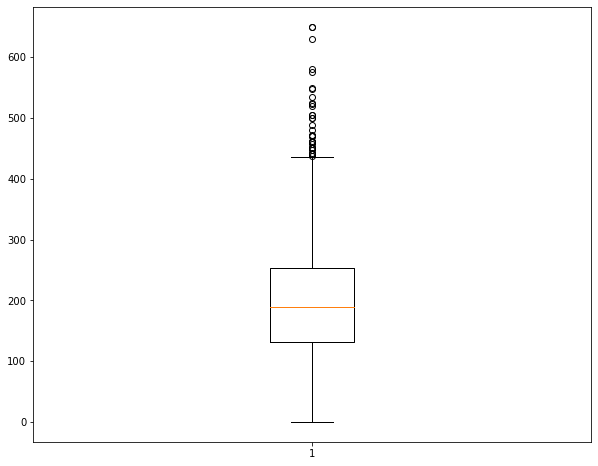

In [33]:
plt.figure(figsize=(10,8))
plt.boxplot(df.Mileage)
plt.show()

#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

In [34]:
# Using IQR - interquntile Range 

Q1 = df['Mileage'].quantile(.25)
Q2 = df['Mileage'].quantile(.5)
Q3 = df['Mileage'].quantile(.75)
IQR = Q3-Q1

# Upper limit and Lower limit
lw = Q1-1.5*IQR
up = Q1+1.5*IQR
print(lw,up)

df.drop(df[df['Mileage'] > up ].index, inplace = True)

-52.0 314.0


C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Mileage'}, xlabel='Mileage', ylabel='Density'>

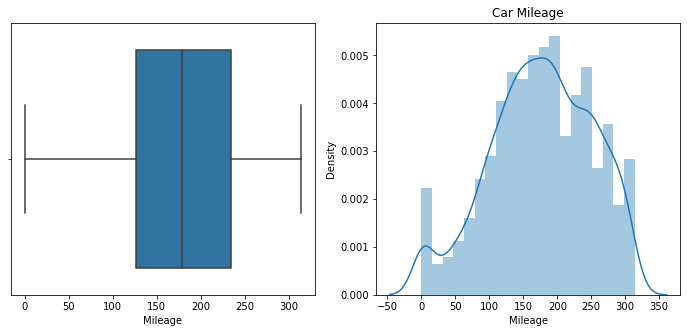

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(df.Mileage)

plt.subplot(122)
plt.title('Car Mileage')
sns.distplot(df.Mileage)

#### 10A. Identify and remove the outliers from `EngineV` column



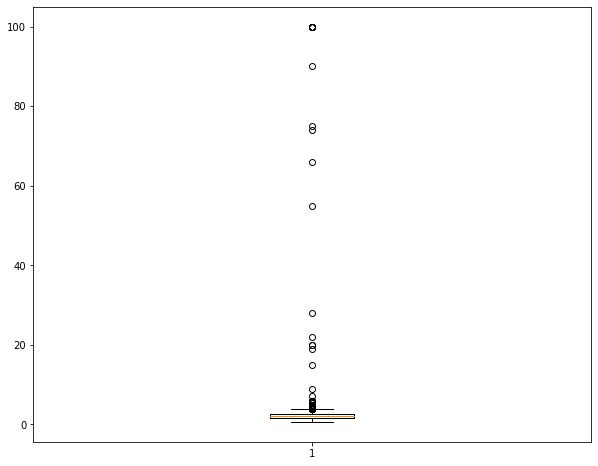

In [36]:
plt.figure(figsize=(10,8))
plt.boxplot(df.EngineV)
plt.show()

In [37]:
# Using IQR - interquntile Range 

Q1 = df['EngineV'].quantile(.25)
Q2 = df['EngineV'].quantile(.5)
Q3 = df['EngineV'].quantile(.75)
IQR = Q3-Q1

# Upper limit and Lower limit
lw = Q1-1.5*IQR
up = Q1+1.5*IQR
print(lw,up)

df.drop(df[df['EngineV'] > up ].index, inplace = True)

0.2500000000000002 2.95


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car EngineV'}, xlabel='EngineV', ylabel='Density'>

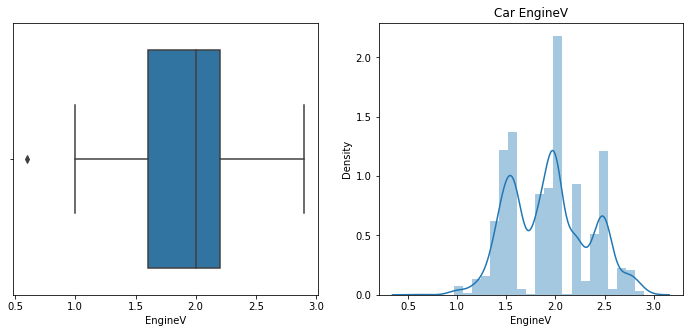

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(df.EngineV)

plt.subplot(122)
plt.title('Car EngineV')
sns.distplot(df.EngineV)

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2179 non-null   object 
 1   Price         2179 non-null   float64
 2   Body          2179 non-null   object 
 3   Mileage       2179 non-null   int64  
 4   EngineV       2179 non-null   float64
 5   Engine Type   2179 non-null   object 
 6   Registration  2179 non-null   object 
 7   Year          2179 non-null   int64  
 8   Model         2179 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 170.2+ KB


In [40]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
brand = LabelEncoder()
df['Brand'] = brand.fit_transform(df['Brand'])
df['Body'] = brand.fit_transform(df['Body'])
df['Engine Type'] = brand.fit_transform(df['Engine Type'])
df['Registration'] = brand.fit_transform(df['Registration'])
df['Model'] = brand.fit_transform(df['Model'])

#### NOTE: Labllng is done means we have changed in Numerical dtype, Now we can compare to each other.

In [42]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,16
4,5,18300.0,0,120,2.0,3,1,2011,129
7,0,14200.0,4,200,2.7,0,1,2006,36
8,4,10799.0,4,193,1.5,0,1,2012,109
9,6,1400.0,2,212,1.8,1,0,1999,79


In [43]:
# OneHotCoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
df.Model.nunique()

176

In [45]:
df.Year.nunique()

38

#### Number of Nunique categorical values in DataSet is greater then to the 10 then we can remove them.

In [46]:
df.drop(['Year','Model'],axis=1,inplace=True)

In [47]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,1,4200.0,3,277,2.0,3,1
4,5,18300.0,0,120,2.0,3,1
7,0,14200.0,4,200,2.7,0,1
8,4,10799.0,4,193,1.5,0,1
9,6,1400.0,2,212,1.8,1,0


In [48]:
print("Brand Number of unique values - "+str(df['Brand'].nunique())+" || Body Number of unique values - "+str(df['Body'].nunique())+"")

Brand Number of unique values - 7 || Body Number of unique values - 6


In [49]:
print("EngineType Number of unique values - "+str(df['Engine Type'].nunique())+" || Registration Number of unique values - "+str(df['Registration'].nunique())+"")

EngineType Number of unique values - 4 || Registration Number of unique values - 2


In [50]:
df.head(2)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,1,4200.0,3,277,2.0,3,1
4,5,18300.0,0,120,2.0,3,1


In [51]:
df = df[['Brand','Body','Mileage','EngineV','Engine Type','Registration','Price']]

In [52]:
df.head(2)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Price
0,1,3,277,2.0,3,1,4200.0
4,5,0,120,2.0,3,1,18300.0


In [53]:
X = pd.get_dummies(df, columns=['Brand','Body','Engine Type','Registration'])

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mileage         2179 non-null   int64  
 1   EngineV         2179 non-null   float64
 2   Price           2179 non-null   float64
 3   Brand_0         2179 non-null   uint8  
 4   Brand_1         2179 non-null   uint8  
 5   Brand_2         2179 non-null   uint8  
 6   Brand_3         2179 non-null   uint8  
 7   Brand_4         2179 non-null   uint8  
 8   Brand_5         2179 non-null   uint8  
 9   Brand_6         2179 non-null   uint8  
 10  Body_0          2179 non-null   uint8  
 11  Body_1          2179 non-null   uint8  
 12  Body_2          2179 non-null   uint8  
 13  Body_3          2179 non-null   uint8  
 14  Body_4          2179 non-null   uint8  
 15  Body_5          2179 non-null   uint8  
 16  Engine Type_0   2179 non-null   uint8  
 17  Engine Type_1   2179 non-null   u

In [55]:
for i in range(7):
    X['Brand_'+str(i)+''] = X['Brand_'+str(i)+''].astype('int')
for i in range(6):
    X['Body_'+str(i)+''] = X['Body_'+str(i)+''].astype('int')
for i in range(2):
    X['Registration_'+str(i)+''] = X['Registration_'+str(i)+''].astype('int')
for i in range(4):
    X['Engine Type_'+str(i)+''] = X['Engine Type_'+str(i)+''].astype('int')

In [56]:
y = df.iloc[:,-1]

In [57]:
X.Price = y
X.head(2)

,Mileage,EngineV,Price,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,4200.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,18300.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Price'],
      dtype='object')

In [60]:
df.rename({'Engine Type' : 'EngineType'},axis=1,inplace=True)

In [61]:
df = df[['Brand','Body','Mileage','EngineV','EngineType','Registration','Price']]

In [62]:
df.head()

,Brand,Body,Mileage,EngineV,EngineType,Registration,Price
0,1,3,277,2.0,3,1,4200.0
4,5,0,120,2.0,3,1,18300.0
7,0,4,200,2.7,0,1,14200.0
8,4,4,193,1.5,0,1,10799.0
9,6,2,212,1.8,1,0,1400.0


In [63]:
x = df.drop('Price',axis=1)

In [64]:
x.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'EngineType', 'Registration'], dtype='object')

In [65]:
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

In [66]:
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [67]:
vif_data.sort_values('VIF',ascending=True)

,feature,VIF
4,EngineType,2.018800
0,Brand,4.297945
1,Body,6.169038
2,Mileage,7.463976
5,Registration,8.238757
3,EngineV,14.120425


In [68]:
# we have to remove the top 2 high varience features.
vif_data.sort_values('VIF',ascending=True).tail(3)

,feature,VIF
2,Mileage,7.463976
5,Registration,8.238757
3,EngineV,14.120425


In [69]:
#### i will remove EngineV because fo high varience.

In [70]:
x.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'EngineType', 'Registration'], dtype='object')

In [71]:
df.drop(['EngineV'],axis=1,inplace=True)

In [72]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineType', 'Registration', 'Price'], dtype='object')

#### 11B. Show the variables which are having Multicollinearity.

Hint: VIF Score

#### VIF means is a measure of the amount of multicolinearity among the independent variable in a set of multiple regression variable. 

##### - A large VIF (varience inflation factor) means highly correlation between the independ features.
##### - A variance inflation factor is a tool to help identify the degree of multicollinearity
##### - Multicollinearity creates a problem in the multiple regression because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model. In statistical terms, a multiple regression model where there is high multicollinearity will make it more difficult to estimate the relationship between each of the independent variables and the dependent variable.

#### Note :  For the data, if VIF will greater then to the 10 then we have to remove those column. becuase in these column high Varience or VIF.

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
df.head(1)

,Brand,Body,Mileage,EngineType,Registration,Price
0,1,3,277,3,1,4200.0


In [75]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineType', 'Registration', 'Price'], dtype='object')

In [76]:
df.shape

(2179, 6)

In [77]:
df.rename(columns={'Engine Type':'EngineType'},inplace=True)

In [78]:
olsmodel = smf.ols(formula='Price~Brand+Body+Mileage+EngineType+Registration',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          3.02e-166
Time:                        15:46:37   Log-Likelihood:                -20959.
No. Observations:                2179   AIC:                         4.193e+04
Df Residuals:                    2173   BIC:                         4.196e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8495.3985    411.876     20.626      0.000    7687.686    9303.111
Brand            8.0296     40.851      0.197      0.844     -72.082      88.142
Body          -297.3911     59.478     -5.000      0.000    -414.032    -180.751
Mileage        -16.3906      1.124    -14.587      0.000     -18.594     -14.187
EngineType    -509.6255     64.112     -7.949      0.000    -635.353    -383.898
Registration  5457.1256    254.852     21.413      0.000    4957.347    5956.904
==============================================================================
Omnibus:                       15.543   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.524
Skew:                           0.169   Prob(JB):                     0.000258
Kurtosis:                       3.261   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

#### R-square :  Any study that attempts to predict human behavior will tend to have R-squared values less than 50%. However, if you analyze a physical process and have very good measurements, you might expect R-squared values over 90%. There is no one-size fits all best answer for how high R-squared should be. we are getting 33% R**2

#### Adj. R-square : Adj. R square should be always less to the R-square.

#### P-value : if, we will consider alpha is 5% (or significance level), then P-value always greater then to the 0.05. however we are getting p value very less like 0.00...

#### 13A. Feature Selection using with Forward Selection

In [79]:
#### Most important column we have after drop high VIF values.
vif_data.sort_values('VIF',ascending=True).tail(1)

,feature,VIF
3,EngineV,14.120425


# Removed EngineV

In [80]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineType', 'Registration', 'Price'], dtype='object')

In [81]:
features = ['Brand','Body','Mileage','EngineType','Registration']
for var in features:
    model = smf.ols(formula='Price~{}'.format(var),data=df).fit()
    print('Price~{} {} {} {} '.format(var, '\np_value:' , model.pvalues[1], '\n'))

Price~Brand 
p_value: 1.8942695377483965e-15 
 
Price~Body 
p_value: 2.0590577985868714e-05 
 
Price~Mileage 
p_value: 9.267224680360548e-71 
 
Price~EngineType 
p_value: 0.9182743387427195 
 
Price~Registration 
p_value: 3.8255465762855946e-114 
 


#### Note: According to the "Backward selection method" : we not getting high P value: so we can't churn the any features.

#### 13B. Feature Selection using with Backward Selection

In [82]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineType', 'Registration', 'Price'], dtype='object')

In [83]:
model = smf.ols(formula='Price~Brand+Body+Mileage+EngineType+Registration'.format(var),data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          3.02e-166
Time:                        15:46:48   Log-Likelihood:                -20959.
No. Observations:                2179   AIC:                         4.193e+04
Df Residuals:                    2173   BIC:                         4.196e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8495.3985    411.876     20.626      0.000    7687.686    9303.111
Brand            8.0296     40.851      0.197      0.844     -72.082      88.142
Body          -297.3911     59.478     -5.000      0.000    -414.032    -180.751
Mileage        -16.3906      1.124    -14.587      0.000     -18.594     -14.187
EngineType    -509.6255     64.112     -7.949      0.000    -635.353    -383.898
Registration  5457.1256    254.852     21.413      0.000    4957.347    5956.904
==============================================================================
Omnibus:                       15.543   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.524
Skew:                           0.169   Prob(JB):                     0.000258
Kurtosis:                       3.261   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Note: Same response through Backward method, we are getting 33% accuracy of the R-square. (Interpretation)

#### 14A. Explain about Assumption of errors and predictors


#### Note: After follow the all valuable step like 'Pre-processing and Elimination' method model is "33%" accurate.

#### 14B. Perform Residual Analysis Give The Interpretations.

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [85]:
X.columns

Index(['Mileage', 'EngineV', 'Price', 'Brand_0', 'Brand_1', 'Brand_2',
       'Brand_3', 'Brand_4', 'Brand_5', 'Brand_6', 'Body_0', 'Body_1',
       'Body_2', 'Body_3', 'Body_4', 'Body_5', 'Engine Type_0',
       'Engine Type_1', 'Engine Type_2', 'Engine Type_3', 'Registration_0',
       'Registration_1'],
      dtype='object')

In [87]:
# shift column Name wise
X = X[['Mileage', 'EngineV', 'Brand_0', 'Brand_1', 'Brand_2',
       'Brand_3', 'Brand_4', 'Brand_5', 'Brand_6', 'Body_0', 'Body_1',
       'Body_2', 'Body_3', 'Body_4', 'Body_5', 'Engine Type_0',
       'Engine Type_1', 'Engine Type_2', 'Engine Type_3', 'Registration_0',
       'Registration_1','Price']]

In [88]:
X.columns

Index(['Mileage', 'EngineV', 'Brand_0', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5', 'Brand_6', 'Body_0', 'Body_1', 'Body_2', 'Body_3',
       'Body_4', 'Body_5', 'Engine Type_0', 'Engine Type_1', 'Engine Type_2',
       'Engine Type_3', 'Registration_0', 'Registration_1', 'Price'],
      dtype='object')

In [89]:
In = X.iloc[:,:-1]
dep = df.iloc[:,-1]

In [90]:
In

,Mileage,EngineV,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
7,200,2.7,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,193,1.5,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
9,212,1.8,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1.6,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4338,163,2.5,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4339,35,1.6,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,194,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [91]:
dep

0        4200.0
4       18300.0
7       14200.0
8       10799.0
9        1400.0
         ...   
4337     6800.0
4338    11500.0
4339    17900.0
4342     8000.0
4344    13500.0
Name: Price, Length: 2179, dtype: float64

In [92]:
reg.fit(In,dep)

LinearRegression()

In [93]:
reg.predict(In)

array([ 7155.33059656, 14899.87543054, 11209.65294859, ...,
       12791.15072384,  8882.8336147 , 11707.01205918])

In [94]:
reg.coef_

array([  -20.81328938,  1046.85448298,   174.83551333,   478.80477614,
         834.0037311 , -1605.75734152, -1844.89139821,  1496.55066784,
         466.45405132,  2854.41404363, -1669.88152391,   171.0001521 ,
        -604.69846676,   -53.78146162,  -697.05274344,  1023.18761069,
        -846.06346946,   271.64143782,  -448.76557904, -2905.22152281,
        2905.22152281])

In [95]:
reg.intercept_

8496.340534356968

In [96]:
In.shape

(2179, 21)

In [97]:
dep.shape

(2179,)

In [98]:
#Intepretations

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X.head(2)

,Mileage,EngineV,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,...,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1,Price
0,277,2.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,4200.0
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,18300.0


In [101]:
In = X.iloc[:,:-1]
dep = X.iloc[:,-1]

In [102]:
In

,Mileage,EngineV,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
7,200,2.7,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,193,1.5,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
9,212,1.8,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1.6,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4338,163,2.5,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4339,35,1.6,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,194,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [103]:
dep

0        4200.0
4       18300.0
7       14200.0
8       10799.0
9        1400.0
         ...   
4337     6800.0
4338    11500.0
4339    17900.0
4342     8000.0
4344    13500.0
Name: Price, Length: 2179, dtype: float64

In [104]:
X_train,X_test,y_train,y_test = train_test_split(In,dep,test_size=0.2)

In [105]:
print(len(In) , len(X_train), len(X_test))

2179 1743 436


#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [106]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [107]:
reg.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred = reg.predict(X_test)

In [109]:
residual = []
print("Y_test , X_test_predict , Error/Resdual")
for i in range(y_test.shape[0]):
    print(list(y_test)[i]  , list(y_pred)[i] , (list(y_test)[i]-list(y_pred)[i]))
    residual.append(list(y_test)[i]-list(y_pred)[i])

Y_test , X_test_predict , Error/Resdual
4600.0 11520.127207645422 -6920.1272076454225
10300.0 11119.287306573122 -819.2873065731219
3900.0 1601.304510427307 2298.695489572693
2650.0 3758.668241176254 -1108.668241176254
6900.0 8823.575985834766 -1923.5759858347665
2900.0 2982.1968436117304 -82.1968436117304
13000.0 9209.944263294321 3790.055736705679
11000.0 8716.488229700011 2283.5117702999887
3000.0 3332.0937660998716 -332.0937660998716
6950.0 6247.739982902811 702.2600170971891
7400.0 8141.516426884524 -741.5164268845238
9950.0 9430.875670618872 519.1243293811276
8800.0 10791.32200818598 -1991.32200818598
7500.0 8415.74216968933 -915.7421696893307
3300.0 4923.085508686682 -1623.0855086866823
7000.0 7592.986313242286 -592.9863132422861
8800.0 8114.027101820032 685.9728981799681
2999.0 6228.026358097684 -3229.0263580976844
9700.0 8507.629437457445 1192.3705625425555
15800.0 11865.36347495174 3934.6365250482595
2500.0 11915.106631887393 -9415.106631887393
12900.0 11520.474340943088 1379

12199.0 11882.062064825343 316.93793517465747
1185.6 6534.487917308548 -5348.887917308548
9300.0 8976.864621617795 323.1353783822051
2500.0 2357.12117274671 142.87882725329018
3100.0 3032.3087768017367 67.69122319826329
2150.0 2444.86734875999 -294.8673487599899
3150.0 13723.711714092331 -10573.711714092331
5800.0 8077.016761644518 -2277.016761644518
6950.0 10350.847907642226 -3400.8479076422263
3000.0 9586.929293134299 -6586.929293134299
2500.0 8871.698207844156 -6371.698207844156
7300.0 7352.364451706575 -52.36445170657498
6300.0 7964.244513009289 -1664.2445130092892
9200.0 9499.954125709573 -299.9541257095734
8999.0 11624.063403865319 -2625.063403865319
13972.07 12640.312411732815 1331.7575882671845
14899.0 11156.338665340496 3742.661334659504
5500.0 6904.9898840155565 -1404.9898840155565
6800.0 5083.997497269971 1716.002502730029
7800.0 9552.625616066503 -1752.6256160665034
12000.0 9116.485169474741 2883.5148305252587
9600.0 11210.475285646904 -1610.475285646904
4600.0 10866.477071

C:\Users\RAJAT SAHU\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


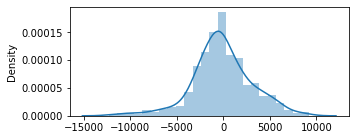

In [110]:
plt.figure(figsize=(5,2))
sns.distplot(residual)
plt.show()

In [111]:
reg.coef_

array([  -21.49988841,  1417.20637167,   153.40639811,   433.07649566,
         885.34830234, -1632.18508189, -1793.56297182,  1398.26099998,
         555.65585762,  2767.82453332, -1514.05087936,    17.99778194,
        -630.54481184,   -54.50111015,  -586.72551391,   923.26369069,
        -877.66360813,   333.44300307,  -379.04308563, -2935.63041439,
        2935.63041439])

In [112]:
reg.intercept_

7891.083842513924

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

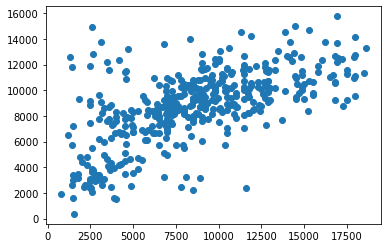

In [113]:
fig,ax = plt.subplots()
plt.scatter(y_test,y_pred)
ax.axline(  (0, reg.intercept_), slope=reg.coef_ , label='regression line')
ax.legend()
plt.show()

In [114]:
MSE = np.mean((y_pred-y_test)**2)
MSE

10385961.874171328

In [115]:
lm_coeficient = pd.DataFrame()
lm_coeficient['Columns'] = X_train.columns
lm_coeficient['Coeficient'] = reg.coef_

In [116]:
lm_coeficient

,Columns,Coeficient
0,Mileage,-21.499888
1,EngineV,1417.206372
2,Brand_0,153.406398
3,Brand_1,433.076496
4,Brand_2,885.348302
5,Brand_3,-1632.185082
6,Brand_4,-1793.562972
7,Brand_5,1398.261000
8,Brand_6,555.655858
9,Body_0,2767.824533


#### 15C. Explain about Lasso Regression and Perform the Ridge Regression

In [117]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=1)
ridgeR.fit(X_train,y_train)

Ridge(alpha=1)

In [118]:
y_test_ridge = ridgeR.predict(X_test)

In [119]:
y_test_ridge.shape

(436,)

In [120]:
lm_coefficient = pd.DataFrame()
lm_coefficient['Columns'] = X_train.columns
lm_coefficient['Estimate'] = pd.Series(ridgeR.coef_)

In [121]:
lm_coefficient

,Columns,Estimate
0,Mileage,-21.506792
1,EngineV,1422.657472
2,Brand_0,147.375575
3,Brand_1,423.770836
4,Brand_2,879.798017
5,Brand_3,-1616.336291
6,Brand_4,-1783.836376
7,Brand_5,1394.189343
8,Brand_6,555.038895
9,Body_0,2738.118625


#### 15D. Explain about Ridge Regression and Perform the Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha=1)
lassoR.fit(X_train,y_train)

Lasso(alpha=1)

In [123]:
y_test_lasso = lassoR.predict(X_test)

In [124]:
y_test_lasso.shape

(436,)

In [125]:
lm_coefficient1 = pd.DataFrame()
lm_coefficient1['Columns'] = X_train.columns
lm_coefficient1['Estimate'] = pd.Series(lassoR.coef_)

In [126]:
lm_coefficient1

,Columns,Estimate
0,Mileage,-2.149799e+01
1,EngineV,1.416582e+03
2,Brand_0,-2.613026e+02
3,Brand_1,0.000000e+00
4,Brand_2,4.482739e+02
5,Brand_3,-2.049672e+03
6,Brand_4,-2.214580e+03
7,Brand_5,9.594306e+02
8,Brand_6,1.222749e+02
9,Body_0,3.205150e+03


### Give the Conclusions about the Model fits for What you Observe.

In [127]:
### Interpretations

In [128]:
In.head(2)

,Mileage,EngineV,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1


####  array(['BMW' : 0, 'Mercedes-Benz' : 1, 'Audi' : 2, 'Toyota' : 3, 'Renault' : 4, 'Volkswagen' : 5,'Mitsubishi' : 6], dtype=object)

####  array(['sedan' : 0, 'van' : 1, 'crossover' : 2, 'vagon' : 3, 'other' : 4, 'hatch' : 5],dtype=object)

####  array(['Petrol' :0, 'Diesel' : 1, 'Gas' : 2, 'Other' : 3], dtype=object)

####  array(['yes' : 0, 'no' : 1], dtype=object)

#### Note: Above mentioned in the array, we are following the labling.

In [129]:
### Labling and assingment
df['Brand'].unique()

array([1, 5, 0, 4, 6, 3, 2])

In [131]:
df['Body'].unique()

array([3, 0, 4, 2, 1, 5])

In [132]:
df['EngineType'].unique()

array([3, 0, 1, 2])

In [133]:
df['Registration'].unique()

array([1, 0])

In [134]:
In.head(2)

,Mileage,EngineV,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1


### We want to Predict

#### I want to Predict : Car features should be - 

####  Mileage : 100 , EngineV : 2.0 , Brand : Renault (4) , Body : sedan (0) , EngineType : Gas (2) , Registration : Yes (1)

In [138]:
reg.predict([[500,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1]])

array([4218.88735815])